In [9]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

from main import load_and_prepare_sessions
from processing.timepoint_analysis import aggregate_signals

sessions = load_and_prepare_sessions("../../Baseline", load_from_pickle=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from collections import defaultdict

In [11]:
from data.setup_utils import Renamer

Renamer.debug_df_renames(sessions[0])

Debugging session: T1_23.25.29.e
Columns in raw: ['Evnt_Time', 'Evnt_ID', 'Evnt_Name', 'Item_Name', 'Alias_Name', 'Group_ID', 'Num_Args', 'Arg1_Name', 'Arg1_Value', 'Arg2_Name', 'Arg2_Value', 'Arg3_Name', 'Arg3_Value', 'Arg4_Name', 'Arg4_Value', 'Arg5_Name', 'Arg5_Value', 'SecFromZero_Bonsai', 'SecFromZero_FP3002']
Columns in ttl: ['Seconds_FP3002', 'Value_FP3002', 'Timestamp_Bonsai', 'SecFromZero_Bonsai', 'SecFromZero_FP3002']
Columns in bonsai_415: ['FrameCount', 'Timestamp_FP3002', 'Timestamp_Bonsai', 'DLS_left', 'DMS_right', 'SecFromZero']
Columns in photwrit_415: ['FrameCounter', 'Timestamp', 'LedState', 'Stimulation', 'Output0', 'Output1', 'Input0', 'Input1', 'DLS_left', 'DMS_right', 'Timestamp_Bonsai', 'SecFromZero_Bonsai', 'SecFromZero_FP3002', 'SecFromTrialStart_Bonsai', 'SecFromTrialStart_FP3002']
Columns in bonsai_470: ['FrameCount', 'Timestamp_FP3002', 'Timestamp_Bonsai', 'DLS_left', 'DMS_right', 'SecFromZero']
Columns in photwrit_470: ['FrameCounter', 'Timestamp', 'LedStat

In [12]:
region_set = set().union(*(set(session.fiber_to_region.values()) for session in sessions))
brain_region_sets = defaultdict(list)

for region in region_set:
    prefix = region.split('_')[0]    
    brain_region_sets[prefix].append(region)

brain_region_sets["all_regions"] = list(region_set)

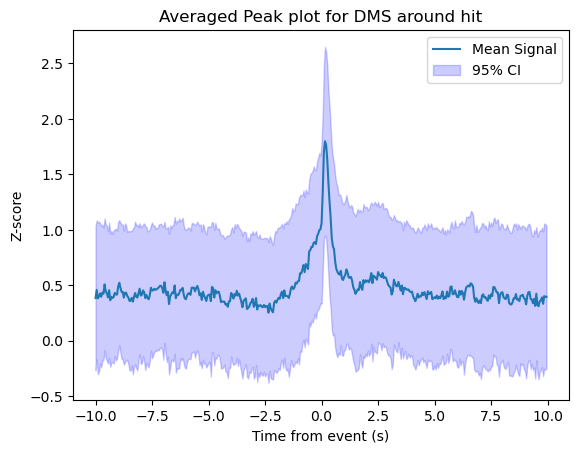

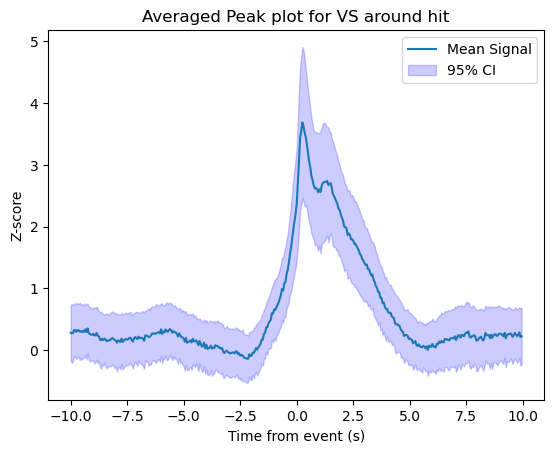

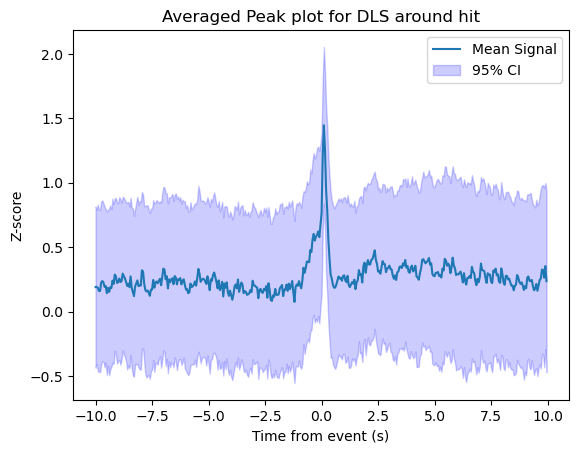

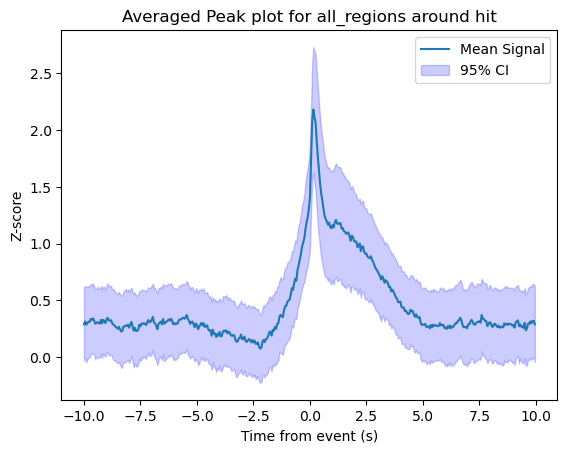

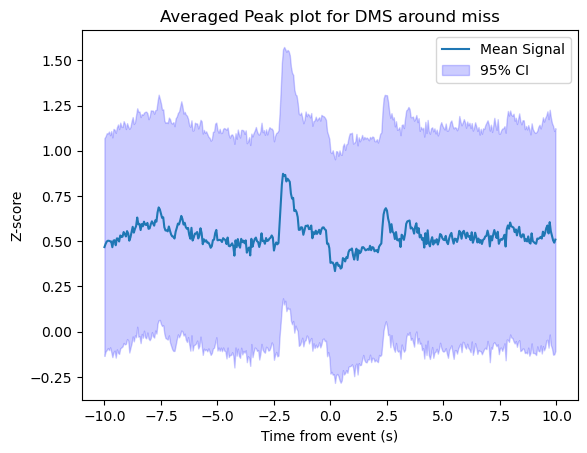

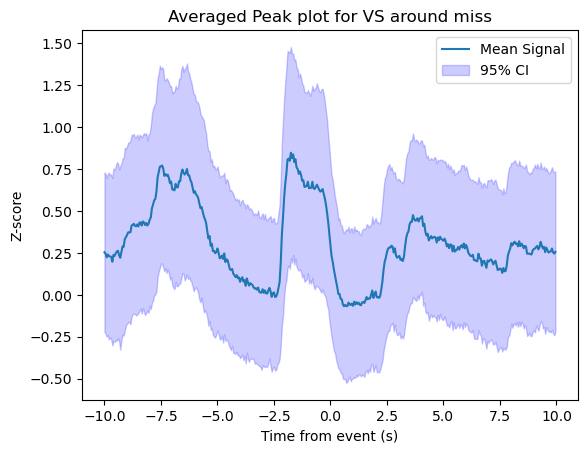

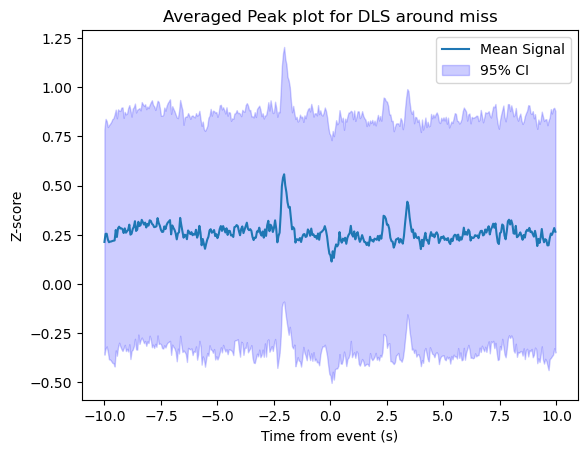

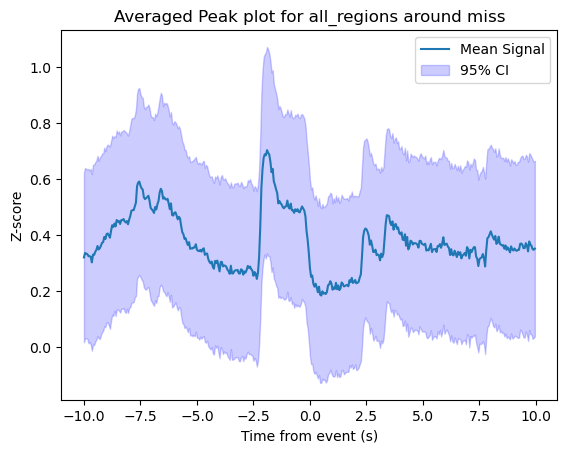

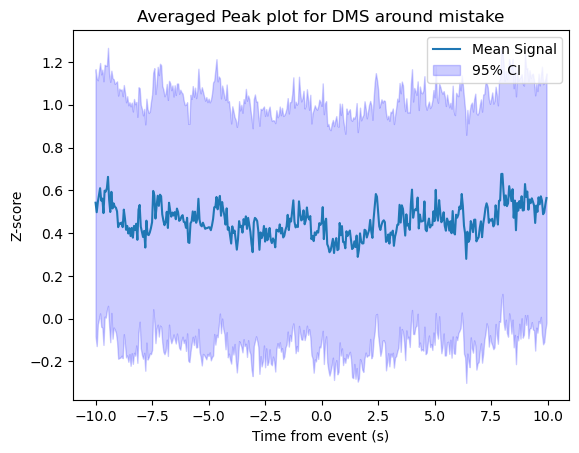

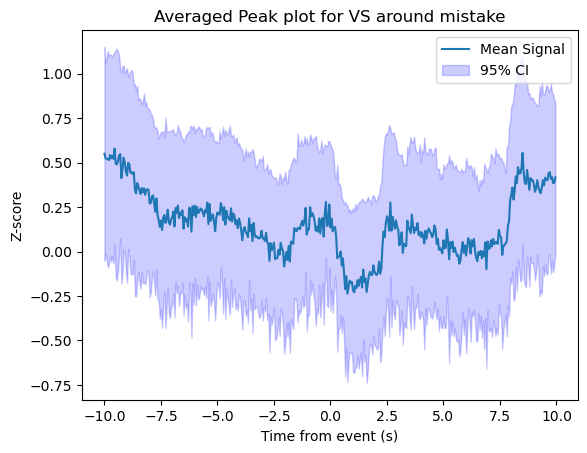

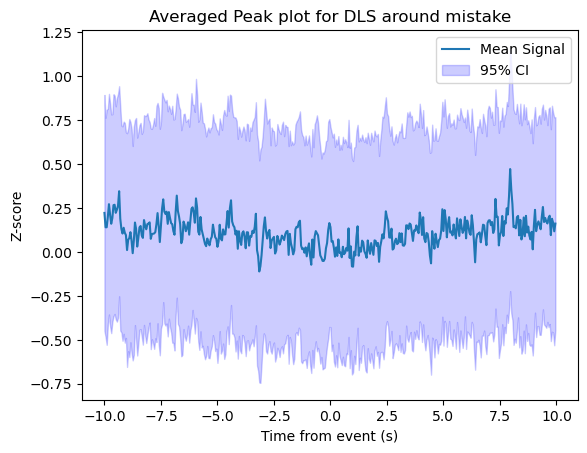

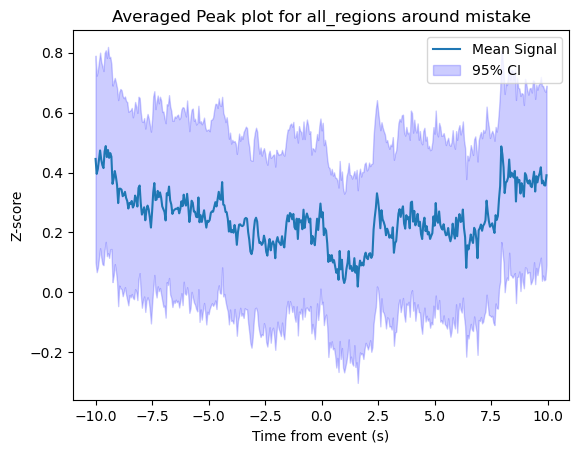

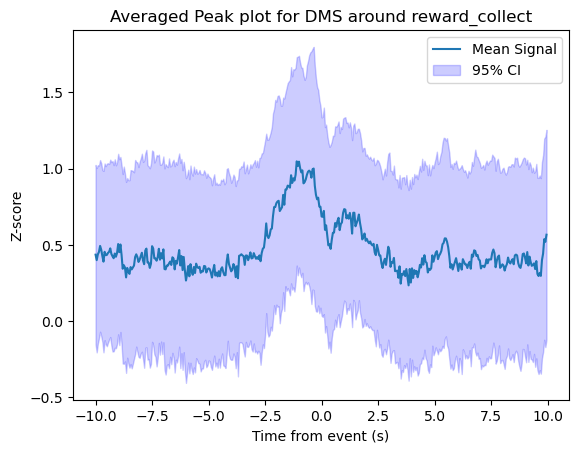

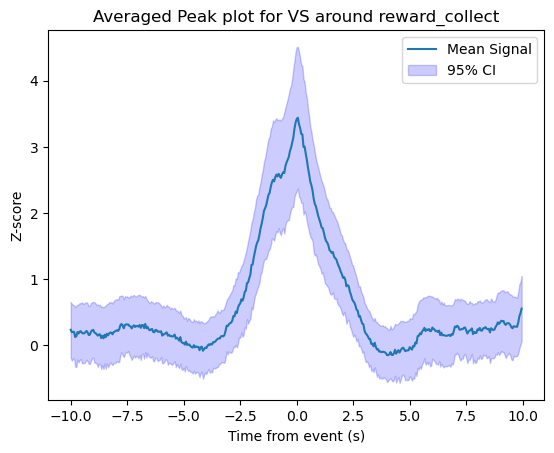

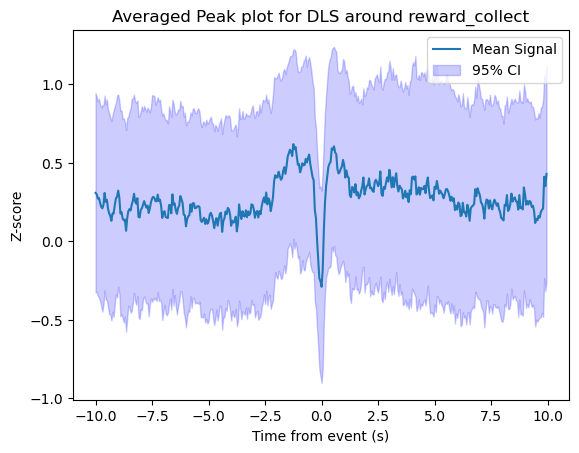

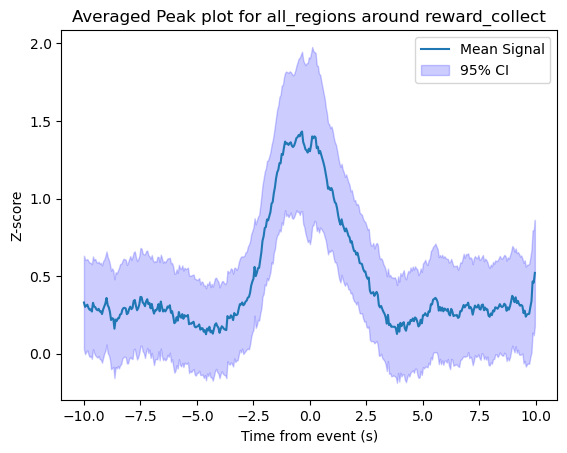

In [15]:
timepoint_types = sessions[0].timepoints_container.fetch_all_data_names()

for timepoint_type in ['hit', 'miss', 'mistake', 'reward_collect']:
    for brain_reg_name, brain_regions in brain_region_sets.items():
        aggregate_signals(sessions, timepoint_type, brain_regions, plot=True, brain_reg_name=brain_reg_name)